## Machine Learning on Blob Dataset

- In noramal Blob is known as drop,droplet,glob etc.
- In this the Sklearn Datasets have function to create own blob dataset.
- This blob are generated with their target using make_blobs in sklearn.
- We will predict blob using Different Classifiers

In [1]:
# Importing imporatant modules or libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

# importing 3D plot module
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Let's Call make_blobs function to create blob 
from sklearn.datasets import make_blobs

In [3]:
# Creating blob and apppending Train and Target to x and y
# Every time you will get random features for target

x,y = make_blobs(n_samples=1200,n_features=2)
print (x,y)

[[-5.08191463 -4.46531381]
 [-5.75231072 -5.87098981]
 [-0.50483977 -7.4173075 ]
 ..., 
 [-2.33680048 -2.62227278]
 [-1.18037033 -5.5298814 ]
 [-0.29952507 -1.6287778 ]] [0 0 1 ..., 2 1 2]


In [4]:
##  Data frmaming to create 
df = pd.DataFrame(x)
df['label']=y

# printing head of Dataframe
df.head()

,0,1,label
0,-5.081915,-4.465314,0
1,-5.752311,-5.870990,0
2,-0.504840,-7.417308,1
3,-6.362892,-4.030085,0
4,-1.318702,-7.004521,1


In [5]:
# Separating features w.r.t. label 0,1,2

blob_0 = df[df['label']==0]
blob_1 = df[df['label']==1]
blob_2 = df[df['label']==2]

# Droping Label for Visulaization

blob_0=blob_0.drop(['label'],axis=1)
blob_1=blob_1.drop(['label'],axis=1)
blob_2=blob_2.drop(['label'],axis=1)

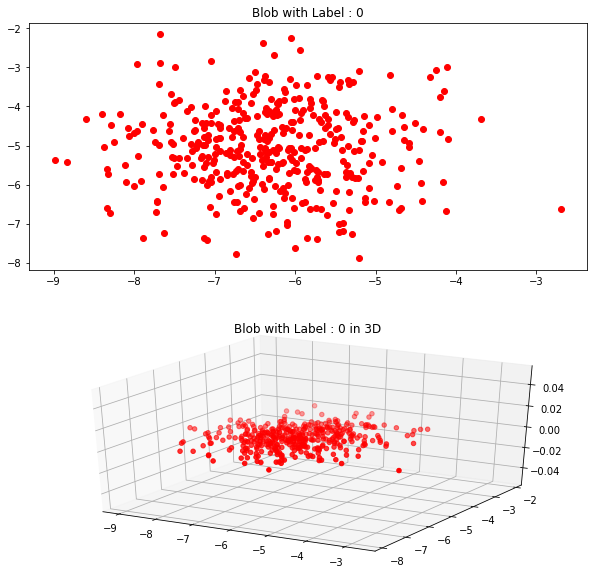

In [17]:
# Plotthing Scatter plot in 2d as well as 3d for blob with label 0 
fig = plt.figure(figsize=(10,10))

# Adding to Subplot: 2D scatter
ax = fig.add_subplot(211)
plt.title('Blob with Label : 0')
plt.scatter(blob_0[0],blob_0[1],color='r')

# Adding to Subplot: 3D scatter
ax = fig.add_subplot(212, projection='3d')
plt.title('Blob with Label : 0 in 3D')
ax.scatter(blob_0[0],blob_0[1], zs=0, c='r', marker='o')

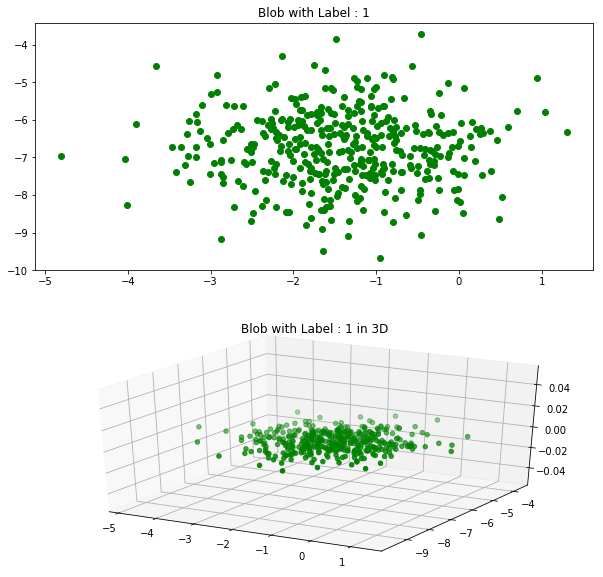

In [20]:
# Plotthing Scatter plot in 2d as well as 3d for blob with label 1 
fig = plt.figure(figsize=(10,10))

# Adding to Subplot: 2D scatter
ax = fig.add_subplot(211)
plt.title('Blob with Label : 1')
plt.scatter(blob_1[0],blob_1[1],color='g')

# Adding to Subplot: 3D scatter
ax = fig.add_subplot(212, projection='3d')
plt.title('Blob with Label : 1 in 3D')
ax.scatter(blob_1[0],blob_1[1], zs=0, c='g', marker='o')

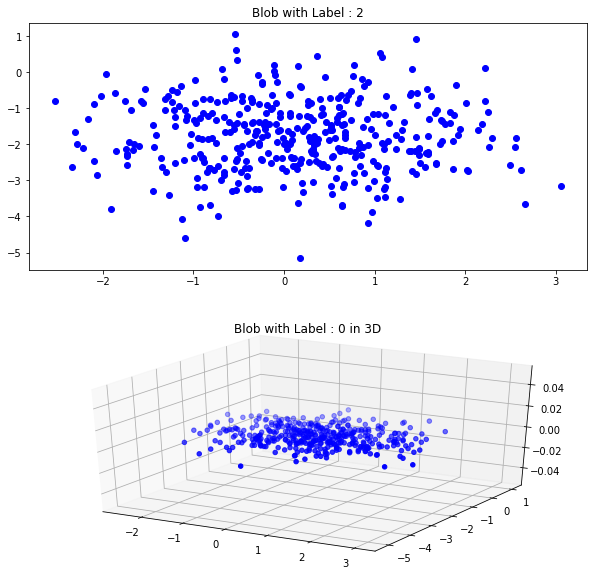

In [21]:
# Plotthing Scatter plot in 2d as well as 3d for blob with label 2 
fig = plt.figure(figsize=(10,10))

# Adding to Subplot: 2D scatter
ax = fig.add_subplot(211)
plt.title('Blob with Label : 2')
plt.scatter(blob_2[0],blob_2[1],color='b')

# Adding to Subplot: 3D scatter
ax = fig.add_subplot(212, projection='3d')
plt.title('Blob with Label : 0 in 3D')
ax.scatter(blob_2[0],blob_2[1], zs=0, c='b', marker='o')

(array([ 400.,    0.,    0.,    0.,    0.,  400.,    0.,    0.,    0.,  400.]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ]),
 <a list of 10 Patch objects>)

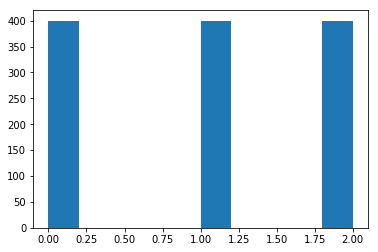

In [33]:
# Using Histogram to plot Number of examples for label 0,1,2
plt.hist(y)

In [34]:
# importing model_selection for train_test_split 
from sklearn.model_selection import train_test_split

In [35]:
# Splitting Test and Training Data from Train and Target Data
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.3,random_state=12)

print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(840, 2) (360, 2) (840,) (360,)


In [36]:
# importing Algorithms to fit model and predict Output

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [37]:
# creating list of tuple wth model and its name  
models = []
models.append(('GNB',GaussianNB()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('DT',DecisionTreeClassifier()))
models.append(('RF',RandomForestClassifier()))
models.append(('LG',LogisticRegression()))

In [40]:
# imorting cross Validation for calcuting score
from sklearn.cross_validation import cross_val_score

acc = []   # list for collecting Accuracy of all model
names = []    # List of model name

for name, model in models:
    
    acc_of_model = cross_val_score(model, X_train, Y_train, cv=10, scoring='accuracy')
    
    # appending Accuray of different model to acc List
    acc.append(acc_of_model)
    
    # appending name of models
    names.append(name)
    
    # printing Output 
    Out = "%s: %f (%f)" % (name, acc_of_model.mean(), acc_of_model.std())
    print(Out)

GNB: 0.994075 (0.007925)
KNN: 0.994075 (0.007925)
DT: 0.985740 (0.011675)
RF: 0.990517 (0.010308)
LG: 0.991679 (0.007574)


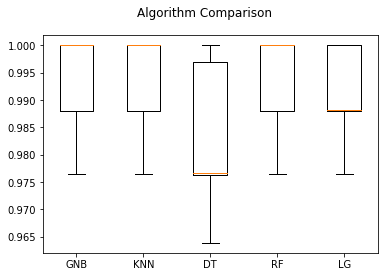

In [39]:
# Compare Algorithms Accuracy with each other on same Dataset
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(acc)
ax.set_xticklabels(names)
plt.show()